# Introducción

Para este análisis se utilizarán datos de viajes de Ford GoBike, este es un servicio de renta de bicicletas en San Francisco California como alternativa de transporte, obtained during 2017 and until July 2018.

MODIFICADO



# Data Ingestion

In this stage of the analysis we consider the next steps in data ingestion:

## Dataset

The extention of our dataset are csv files, in total we have 8 files, the first contains the data of 2017 and the rest, the data of every month of 2018 until July, giving a total size of 323 MB. In the code below we import pandas for a dataframe visualization of the dataset, then each csv file is assign to a variable using the *read_csv* function and finally we concatenate     

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv("https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv",parse_dates=True)
df2 = pd.read_csv("data/201801-fordgobike-tripdata.csv",parse_dates=True)
df3 = pd.read_csv("data/201802-fordgobike-tripdata.csv",parse_dates=True)
df4 = pd.read_csv("data/201803-fordgobike-tripdata.csv",parse_dates=True)
df5 = pd.read_csv("data/201804-fordgobike-tripdata.csv",parse_dates=True)
df6 = pd.read_csv("data/201805-fordgobike-tripdata.csv",parse_dates=True)
df7 = pd.read_csv("data/201806-fordgobike-tripdata.csv",parse_dates=True)
df8 = pd.read_csv("data/201807-fordgobike-tripdata.csv",parse_dates=True)

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=0)

C:\Users\Laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


Ahora se acceden las observaciones iniciales:

In [3]:
sort = False
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


# Explorative Data Analysis

This stage is our first interaction with the dataset, in here we get to know how many observations and features we have and their type. We can also study possible correlations and try different types of data visualizations like histograms and boxplots. This stage can be divided in structure and content analysis.

## Structure Analysis

In this section, we are going to determine some basic structure features of the dataset. First, we observe that the data set consists of 1 538 086 observations and 16 features.


In [16]:
print(df.shape)

(1538086, 16)


Below we can see the name of each feature and the type of data it contains. 

In [17]:
df.dtypes

bike_id                      int64
bike_share_for_all_trip     object
duration_sec                 int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
member_birth_year          float64
member_gender               object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object

We can observe that the dataset has different types of data. There are some numerical features; such as latitude and longitude of the start and end station, some others are categorical; such as member_gender and bike_share_for_all_trip, and also we have some strings, such as the names of the stations. 

In the next code, we can see the amount of non-null observations of each feature. The "bike_share_for_all_trip" feature has less non-null observations than the rest because in 2017 this feature was not measured. We can also notice that the features start and end station's names and id have the same amount of missing values. Probably there were some observations that did not register the information about arrival and departure stations. The member_birth_year and member_gender features have some missing values. The other features do not have any null value. The treatment for these missing values will be developed in the section about data cleaning and transformation. 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538086 entries, 0 to 199221
Data columns (total 16 columns):
bike_id                    1538086 non-null int64
bike_share_for_all_trip    1018386 non-null object
duration_sec               1538086 non-null int64
end_station_id             1532841 non-null float64
end_station_latitude       1538086 non-null float64
end_station_longitude      1538086 non-null float64
end_station_name           1532841 non-null object
end_time                   1538086 non-null object
member_birth_year          1400419 non-null float64
member_gender              1400760 non-null object
start_station_id           1532841 non-null float64
start_station_latitude     1538086 non-null float64
start_station_longitude    1538086 non-null float64
start_station_name         1532841 non-null object
start_time                 1538086 non-null object
user_type                  1538086 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 199.5+ MB


## Content Analysis

Now we analize content aspects as basic statistics, distribution of the features, count of values for categorical features, correlation between features and so on.

Below we can see the basic statistics for the quantitative features in the dataset, 


In [19]:
df.describe()


,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,1.538086e+06,1.538086e+06,1.532841e+06,1.538086e+06,1.538086e+06,1.400419e+06,1.532841e+06,1.538086e+06,1.538086e+06
mean,2.020603e+03,9.573795e+02,1.056254e+02,3.776912e+01,-1.223547e+02,1.981805e+03,1.076984e+02,3.776897e+01,-1.223553e+02
std,1.152290e+03,2.891834e+03,9.259640e+01,9.756527e-02,1.517343e-01,1.056463e+01,9.297119e+01,9.766799e-02,1.521276e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.728000e+01,-1.224443e+02,1.881000e+03,3.000000e+00,3.731285e+01,-1.224443e+02
25%,1.045000e+03,3.610000e+02,2.700000e+01,3.777241e+01,-1.224103e+02,1.976000e+03,2.800000e+01,3.777179e+01,-1.224117e+02
50%,2.072000e+03,5.690000e+02,7.700000e+01,3.778240e+01,-1.223974e+02,1.984000e+03,7.900000e+01,3.778175e+01,-1.223984e+02
75%,2.952000e+03,8.970000e+02,1.710000e+02,3.779539e+01,-1.223881e+02,1.989000e+03,1.730000e+02,3.779539e+01,-1.223881e+02
max,4.307000e+03,8.636900e+04,3.570000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.570000e+02,4.551000e+01,-7.357000e+01


From the previous information there are some basic inferences we can start thinking about. For instance, the feature with highest standard deviation is the duration of the trip, which is around 2891,83. We can infer then, that the bike users are very heterogeneous about the time they use the bike. Other features with high standard deviation are start and end station id, which makes us think that users are not accumulated on the same stations all time. Also, we can see that the users´ age is varied, so we do not have people only from an specific life stage. 

It catches the attention the fact that at least one user has 1881 as birth year. This is probably a mistake since the information is from 2017 and 2018. 

Something important to mention is that even though the feature bike_id has a high standard deviation, this is not very informative since the nature of the feature is only an index to identify the bike but it is not relevant the exact bike a user used to the trip. 

Now we are going to explore the distribution of some features in a more visual way using histograms.  


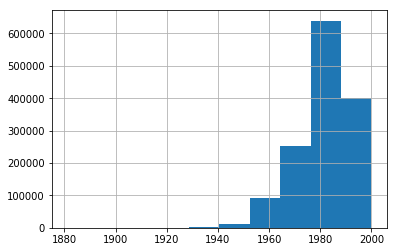

In [20]:
df['member_birth_year'].hist()

Ignoring the data with birth year equal to 1881, we can see that most users are in their 30´s and 40´s, but there are also a great quantity of younger users. We also observe how the amount of older people is much less, which has sense because we would think that older people do not use to take bike trips due to their physical condition and how demanding is riding a bike. 

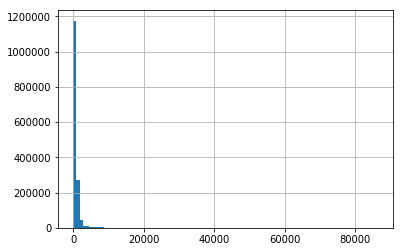

In [5]:
df['duration_sec'].hist(bins=100)

The previous histogram shows some important facts. First we can see a very asimetric distribution of the duartion of the trips, it has an important accumulation of observations with very short duration. It means that most users' trips are short. However, as it is also shown in the table of basic statistics, there are observations with a big duration, but as you can appreciate they are very few, almost unnoticible. 

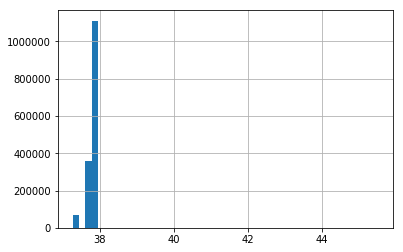

In [11]:
df['end_station_latitude'].hist(bins=50)

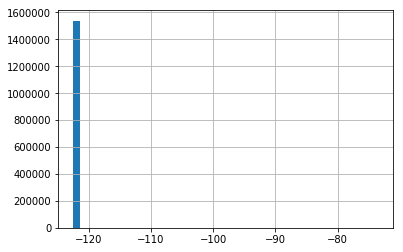

In [8]:
df['end_station_longitude'].hist(bins=50)

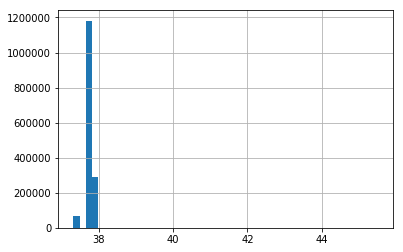

In [9]:
df['start_station_latitude'].hist(bins=50)

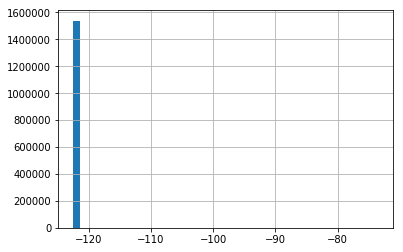

In [10]:
df['start_station_longitude'].hist(bins=50)

In general, it is easy to note that not only the measures of latitude but also the measures of longitude are very similar for the start stations and the end stations. That is a clear indicator that users travel only small distances on their bikes, because the start station is very near from the end station. This information is compatible with the fact that we comment before about the distribution of the duration of trips. In other words, as we found that a very high percentage of users lasts some few minutes using the bikes, that means that their destination or end station is very near from the place or station they went out. 

On the other hand, next information allows us to know that users are mostly men and that there are more suscribed members that casual customers who use the bycicles. Likewise, most users are not in the social program that helps them in case they have low resources. 


In [26]:
print(df.groupby("member_gender").size())
print(df.groupby("user_type").size())
print(df.groupby("bike_share_for_all_trip").size())

member_gender
Female     336222
Male      1043512
Other       21026
dtype: int64
user_type
Customer       271263
Subscriber    1266823
dtype: int64
bike_share_for_all_trip
No     934032
Yes     84354
dtype: int64


In the next code lines we see which is the maximum and minimum number of times that a start station or an end station has been visited by an user. 

We created some histograms too, to approximate the distribution of the amount of times that the start or end station has been visited, where we can infer that practically the start stations with more visits are also the end stations with more visits by users. This last idea will be retaken later with the help of some scatterplots.  

In [27]:
df['end_station_id'].value_counts().max()


43013

In [28]:
df['end_station_id'].value_counts().min()


5

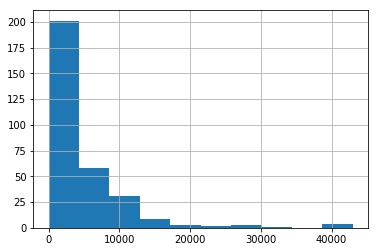

In [29]:
df['end_station_id'].value_counts().hist()

In [44]:
df['start_station_id'].value_counts().max()


37401

In [45]:
df['start_station_id'].value_counts().min()

2

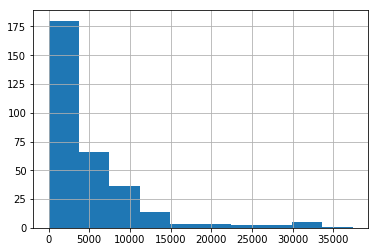

In [57]:
df['start_station_id'].value_counts().hist()

Boxplots are also a useful tool to observe the features distributions, and it is easy to identify outliers. So in the next graphs we present boxplots for the features in the dataset. 

957.3794950347379

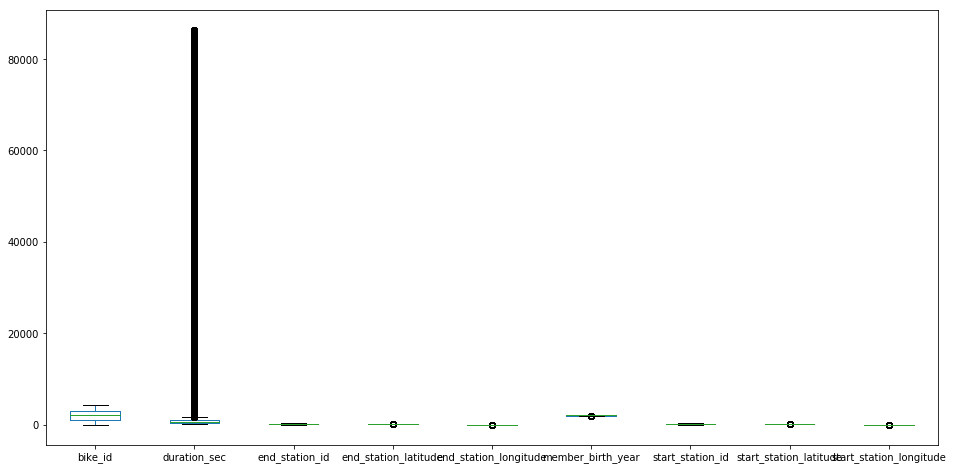

In [14]:
df.plot(kind='box',figsize=(16,8))
df["duration_sec"].mean()

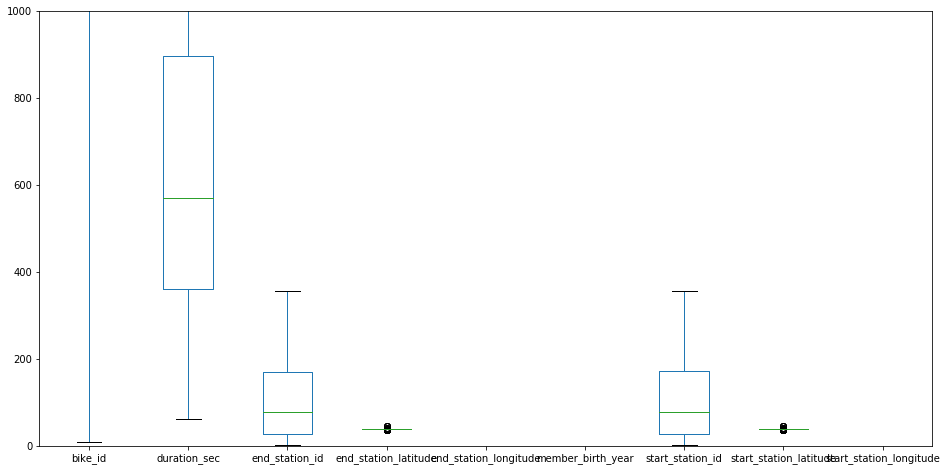

In [16]:
df.plot(kind='box',ylim=[0,1000],figsize=(16,8))

One of the findings that we should highlight from the previous graphs is that the feature duration in seconds of the trip has some strong outliers, because even though most of observations remain between 300 and 1000, and even the mean is 957,38 seconds, there are observations with more that 8000 seconds of duration. So it would be important to consider deleting this observation that will probable cause problems when we are applying some machine learning methods to get information from the dataset in a more formal way. 

Finally, it is very important to know the relationship between the features that we are working with, that is why we compute the correlation matrix between the numeric variables.

In [21]:
df.corr()


,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
bike_id,1.000000,-0.009014,-0.053438,0.020492,-0.064389,0.018801,-0.055265,0.020229,-0.064182
duration_sec,-0.009014,1.000000,-0.004209,0.001224,-0.004224,0.003733,-0.010187,0.000621,-0.003259
end_station_id,-0.053438,-0.004209,1.000000,-0.317472,0.625223,0.106103,0.541569,-0.295858,0.631242
end_station_latitude,0.020492,0.001224,-0.317472,1.000000,-0.477717,-0.074020,-0.292187,0.990668,-0.477264
end_station_longitude,-0.064389,-0.004224,0.625223,-0.477717,1.000000,0.070869,0.616172,-0.476294,0.996212
member_birth_year,0.018801,0.003733,0.106103,-0.074020,0.070869,1.000000,0.107115,-0.073836,0.070216
start_station_id,-0.055265,-0.010187,0.541569,-0.292187,0.616172,0.107115,1.000000,-0.305187,0.613084
start_station_latitude,0.020229,0.000621,-0.295858,0.990668,-0.476294,-0.073836,-0.305187,1.000000,-0.473076
start_station_longitude,-0.064182,-0.003259,0.631242,-0.477264,0.996212,0.070216,0.613084,-0.473076,1.000000


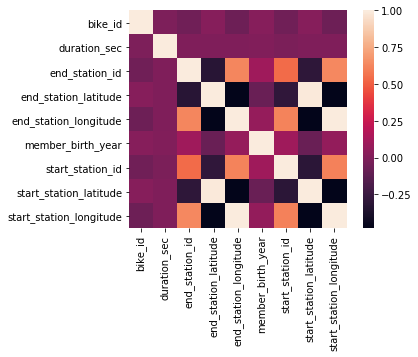

In [22]:
sns.heatmap(df.corr(), square=True)

It is easy to note that the latitude between the start stations and the end stations of users have a linear correlation significantly high, it is very close to 1. The same thing happens with the case of the longitude. We can also observe that no other pair of features is highly correlated. 

We have already observe the previous idea on the histograms, however, to illustrate this even better, we created some scatterplots between these variables and it is easy to observe the relationship mentioned previously, because in general, as the latitude of the start station increases, so does the latitude of the end station. And the same thing happens with the longitude, with a special concentration in the lower values.  

This last idea is complemented with the histograms that we observed above about the distribution of the latitude and longitude of the start and end stations, because we observed an important accumulationof data in the smaller values. Another idea that is reinforced with this accumulation of points, is that the start stations more utilized by users are also the end stations with more frequent use, as we could observed in previous histograms. 

And finally, something that can explain the high correlation between not only the latitude but also the longitude of the start and end stations of each user is that; as we have already indicated, the tours have on average a duration time in seconds relatively short, so it is not strange that the end station of an user is very near from the one he left some minutes ago. 

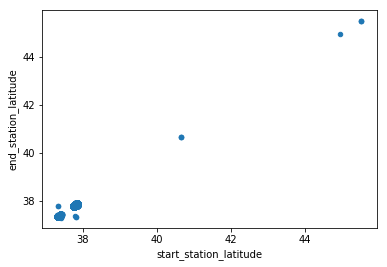

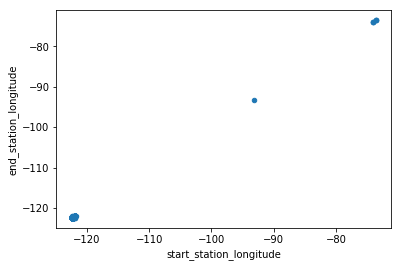

In [69]:
df.plot.scatter(x='start_station_latitude', y='end_station_latitude')
df.plot.scatter(x='start_station_longitude', y='end_station_longitude')

## Normalization

Normalization processes should be applied to all Datasets, with the purpose that the magnitude and representation of the data will not be the cause of poor results.

For this, the separation of the numerical and categorical attributes must be done, because the content of both is completely incompatible.

Therefore, the normalization "One-hot encoding" is applied to the categorical attributes and "z-score" normalization to the numerical attributes.

In [30]:
## The initial dataset is presented, to remember its structure and content
df

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber
5,1487,NaN,9226,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.1660,NaN,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.9180,Customer
6,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,Customer
7,1503,NaN,4334,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.2110,NaN,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.1960,Customer
8,3125,NaN,4150,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.3080,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.5480,Customer
9,2543,NaN,4238,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.0530,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.1450,Customer


The dummies technique is applied to certain categorical attributes.

In this dataset an attribute to which it is advisable to apply "one-hot encoding" is to the user type column "user_type", since it has only two categories.

In [40]:
dummies_user_type = pd.get_dummies(df.user_type)
dummies_user_type.head()

,Customer,Subscriber
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


Then you must concatenate the new columns to the dataset and delete the column to which dummies are applied.

In [60]:
#It is concatenated
merged_user_type = pd.concat([df, dummies_user_type],axis='columns')
merged_user_type

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,Customer,Subscriber
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer,1,0
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer,1,0
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer,1,0
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer,1,0
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber,0,1
5,1487,NaN,9226,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.1660,NaN,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.9180,Customer,1,0
6,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,Customer,1,0
7,1503,NaN,4334,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.2110,NaN,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.1960,Customer,1,0
8,3125,NaN,4150,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.3080,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.5480,Customer,1,0
9,2543,NaN,4238,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.0530,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.1450,Customer,1,0


In [61]:
#The dummies column is removed
df_temporal = merged_user_type.drop(['user_type'], axis='columns')
df_temporal.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,Customer,Subscriber
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,1,0
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,1,0
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,1,0
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,1,0
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,0,1


The same applies to the person's gender column

In [42]:
dummies_member_gender = pd.get_dummies(df.member_gender)
dummies_member_gender.head()

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,0,0
3,0,0,0
4,1,0,0


In the case of numerical attributes or columns, the standard normalization is applied, which consists in subtracting its mean from the data and dividing it by the standard deviation.

In [59]:
from scipy.stats import zscore
colum='duration_sec'
df_temporal['zscores_duration'] = (df_temporal[colum] - df_temporal[colum].mean())/df_temporal[colum].std(ddof=0)
df_temporal

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,Customer,Subscriber,zscores_duration
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,1,0,27.371085
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,1,0,26.918085
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,1,0,15.495574
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,1,0,21.168100
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,0,1,14.746914
5,1487,NaN,9226,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.1660,NaN,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.9180,1,0,2.859300
6,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,1,0,1.227464
7,1503,NaN,4334,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.2110,NaN,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.1960,1,0,1.167640
8,3125,NaN,4150,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.3080,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.5480,1,0,1.104013
9,2543,NaN,4238,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.0530,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.1450,1,0,1.134443
